Mbambo AM 22305677

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [21]:
# 3. Load the CSV files
train_path = '/content/drive/MyDrive/titanic/train.csv'
test_path = '/content/drive/MyDrive/titanic/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [22]:
# 4. Display the first few rows of each dataframe
print("Train Data:")
display(train_df.head())

print("Test Data:")
display(test_df.head())

Train Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test Data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
# Preprocessing pipeline
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [24]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [26]:
# Apply preprocessing to training data
X = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']
X_preprocessed = preprocessor.fit_transform(X)


In [27]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_preprocessed, y, test_size=0.3, random_state=42
)

In [32]:
# 1. Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [33]:
# 2. Preprocessing (basic)
df = train_df.copy()

In [34]:
# Drop irrelevant columns
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [35]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-1660281261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1660281261.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [36]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


In [37]:
# 3. Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']


In [38]:
# 4. Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# 5. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [40]:
# 5. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)


In [41]:
# 6. Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_pred))
print(classification_report(y_val, lr_pred))

Logistic Regression Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
# Predict on validation set
rf_pred = rf_model.predict(X_val)


In [45]:
# Evaluate the model
print("\nRandom Forest Accuracy:", accuracy_score(y_val, rf_pred))
print(classification_report(y_val, rf_pred))



Random Forest Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [46]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

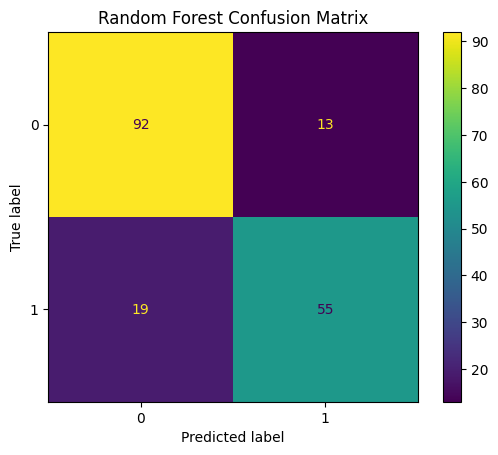

In [47]:
cm = confusion_matrix(y_val, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

In [48]:
# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)



Feature Importance:
    Feature  Importance
1       Sex    0.271410
5      Fare    0.265010
2       Age    0.249995
0    Pclass    0.086957
3     SibSp    0.053685
4     Parch    0.039897
6  Embarked    0.033044


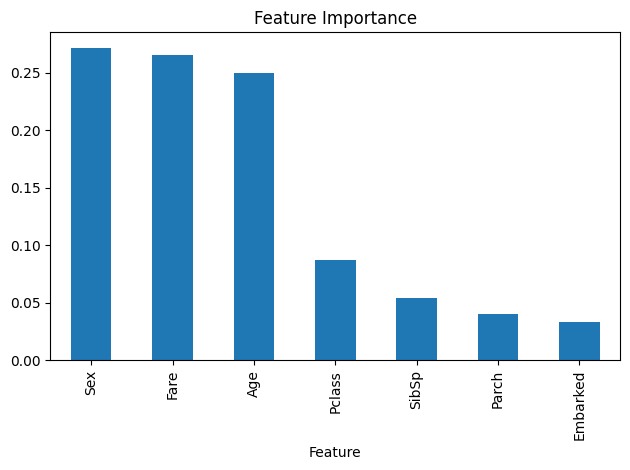

In [49]:
# Optional: plot
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importance')
plt.tight_layout()
plt.show()

In [50]:
# Make a copy
test_data = test_df.copy()

In [51]:
# Drop irrelevant columns
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [52]:
# Fill missing values
test_data['Age'].fillna(train_df['Age'].median(), inplace=True)
test_data['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-553916705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-553916705.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [53]:
# Encode categorical features using same encoders
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])

In [54]:
# Save PassengerId for final output
passenger_ids = test_data['PassengerId']


In [55]:
# Drop PassengerId for prediction
X_test = test_data.drop('PassengerId', axis=1)


In [56]:
# Scale features (use same scaler as training)
X_test_scaled = scaler.transform(X_test)


In [57]:
# Logistic Regression Prediction
lr_test_pred = lr_model.predict(X_test_scaled)

# Random Forest Prediction
rf_test_pred = rf_model.predict(X_test_scaled)


In [64]:
# Create submission DataFrames
lr_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': lr_test_pred
})

rf_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': rf_test_pred
})

# Preview
print("Logistic Regression Predictions:")
print(lr_submission.head())

print("\nRandom Forest Predictions:")
print(rf_submission.head())


Logistic Regression Predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

Random Forest Predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
